In [33]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats as st

In [36]:
import scipy

In [2]:
df = pd.read_csv("exams.csv", sep = ',')

In [20]:
df_1 = df.query('math>20')

In [26]:
df_1 = df_1.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))
df_1

,gender,race_ethnicity,parent_education_level,lunch,test_prep_course,math
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88
996,male,group C,high school,free/reduced,none,62
997,female,group C,high school,free/reduced,completed,59
998,female,group D,some college,standard,completed,68


__Рассмотрим как влияют различные группы факторов на величину оценки по математике__

<AxesSubplot:>

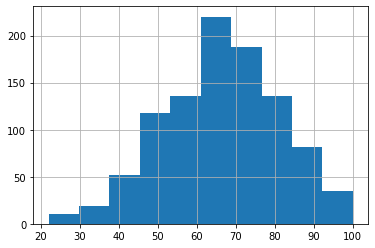

In [6]:
df_1.math.hist()


- __Нулевая гипотеза H0:__ на отметку по математике не влияют различные факторы


- __Альтернативная гипотеза H1:__ на величину отметки по математике оказывают влияние различные факторы

__Расмотрим влияние национальной принадлежности на величину отметки по математике__

In [29]:
df_1['race_ethnicity'].value_counts()

group C    318
group D    262
group B    187
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [31]:
A = df_1.query('race_ethnicity=="group A"').math
B = df_1.query('race_ethnicity=="group B"').math
C = df_1.query('race_ethnicity=="group C"').math
D = df_1.query('race_ethnicity=="group D"').math
E = df_1.query('race_ethnicity=="group E"').math

In [37]:
#проверка на однородность дисперсий
scipy.stats.levene(A, B, C, D, E)

LeveneResult(statistic=0.5554664321392196, pvalue=0.6950737218982223)

pvalue > 0.05 принимаем нулевую гипотезу

In [42]:
#однофакторный анализ
ss.f_oneway(A, B, C, D, E)

F_onewayResult(statistic=14.230353484366937, pvalue=2.6757865311025053e-11)

- pvalue <0.05 отклоняем нулевую гипотезу, принимаем альтернативную.

In [47]:
#сравнения Тьюки
pairwise_tukeyhsd(df_1.math, df_1.race_ethnicity).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
group A,group B,2.6007,0.6264,-2.4678,7.6693,False
group A,group C,3.0375,0.3985,-1.6824,7.7573,False
group A,group D,5.7334,0.0106,0.9045,10.5623,True
group A,group E,12.1922,0.0,6.8564,17.528,True
group B,group C,0.4367,0.9975,-3.1903,4.0638,False
group B,group D,3.1326,0.1548,-0.6352,6.9005,False
group B,group E,9.5915,0.0,5.1927,13.9903,True
group C,group D,2.6959,0.1647,-0.588,5.9799,False
group C,group E,9.1548,0.0,5.1627,13.1468,True
group D,group E,6.4588,0.0002,2.3384,10.5793,True


- На величину отметки по математике оказывает влияние национальная принадлежность студентов

__Расмотрим влияние пола на величину отметки по математике__

In [48]:
df_1['gender'].value_counts()

female    514
male      482
Name: gender, dtype: int64

In [49]:
A1 = df_1.query('gender=="female"').math
B1 = df_1.query('gender=="male"').math

In [50]:
#проверка на однородность дисперсий
scipy.stats.levene(A1, B1)

LeveneResult(statistic=0.0008682970916602684, pvalue=0.9764981474773227)

- pvalue > 0.05 принимаем нулевую гипотезу

In [54]:
#однофакторный анализ
ss.f_oneway(A1, B1)

F_onewayResult(statistic=25.636312987753477, pvalue=4.910666089618626e-07)

- pvalue <0.05 отклоняем нулевую гипотезу, принимаем альтернативную

In [55]:
#сравнения Тьюки
pairwise_tukeyhsd(df_1.math, df_1.gender).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
female,male,4.6874,0.0,2.8707,6.504,True


- male > female, следовательно, на оценку по математике оказывает влияет пол (у студентов мужского пола отметка по математике выше)

__Расмотрим влияет ли на величину отметки по математике прошел ли студент подготовительный курс__

In [56]:
df_1['test_prep_course'].value_counts()

none         638
completed    358
Name: test_prep_course, dtype: int64

In [57]:
A2 = df_1.query('test_prep_course=="none"').math
B2 = df_1.query('test_prep_course=="completed"').math

In [58]:
#проверка на однородность дисперсий
scipy.stats.levene(A2, B2)

LeveneResult(statistic=0.09968996427426897, pvalue=0.7522682867889527)

pvalue > 0.05 принимаем нулевую гипотезу

In [64]:
#однофакторный анализ
ss.f_oneway(A2, B2)

F_onewayResult(statistic=30.19653677123524, pvalue=4.9608359860911716e-08)

- pvalue<0.05 отклоняем нулевую гипотезу, принимаем альтернативную

In [67]:
#сравнения Тьюки
pairwise_tukeyhsd(df_1.math, df_1.test_prep_course).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
completed,none,-5.2864,0.0,-7.1743,-3.3986,True


- На величину оценки по математике влияет прошел ли он подготовительный курс (у тех студентов, которые прошли подготовительный курс, отметка намного выше (none < completed))

__Расмотрим влияет ли на величину отметки по математике уровень образования родителя__

In [69]:
df_1['parent_education_level'].value_counts()

some college          225
associate's degree    222
high school           195
some high school      177
bachelor's degree     118
master's degree        59
Name: parent_education_level, dtype: int64

In [85]:
A3 = df_1.query('parent_education_level=="some college"').math
B3 = df_1.query('parent_education_level=="high school"').math
C3 = df_1.query('parent_education_level=="some high school"').math

In [86]:
#проверка на однородность дисперсий
scipy.stats.levene(A3, B3, C3)

LeveneResult(statistic=0.5492905927134344, pvalue=0.5776522287576265)

- pvalue > 0.05 принимаем нулевую гипотезу

In [87]:
#однофакторный анализ
ss.f_oneway(A3, B3, C3)

F_onewayResult(statistic=6.493358556197215, pvalue=0.0016231382415017768)

- pvalue<0.05 отклоняем нулевую гипотезу, принимаем альтернативную

In [88]:
#сравнения Тьюки
pairwise_tukeyhsd(df_1.math, df_1.parent_education_level).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
associate's degree,bachelor's degree,1.5069,0.945,-3.2415,6.2554,False
associate's degree,high school,-5.4675,0.002,-9.5582,-1.3768,True
associate's degree,master's degree,1.8629,0.9533,-4.242,7.9678,False
associate's degree,some college,-0.5407,0.9988,-4.4835,3.4022,False
associate's degree,some high school,-3.7699,0.1075,-7.9699,0.4301,False
bachelor's degree,high school,-6.9744,0.0006,-11.8356,-2.1133,True
bachelor's degree,master's degree,0.3559,1.0,-6.2899,7.0017,False
bachelor's degree,some college,-2.0476,0.82,-6.785,2.6898,False
bachelor's degree,some high school,-5.2768,0.0291,-10.2303,-0.3234,True
high school,master's degree,7.3304,0.0098,1.1374,13.5234,True


- На отметку по математике оказывает некоторое влияние уровень образования родителя.

__Расмотрим как оказывает влияние на величину отметки по математике бесплатное питание__

In [90]:
df_1['lunch'].value_counts()

standard        644
free/reduced    352
Name: lunch, dtype: int64

In [91]:
A4 = df_1.query('lunch=="standard"').math
B4 = df_1.query('lunch=="free/reduced"').math

In [92]:
#проверка на однородность дисперсий
scipy.stats.levene(A4, B4)

LeveneResult(statistic=1.8526255459931282, pvalue=0.17378681837469295)

- pvalue > 0.05 принимаем нулевую гипотезу

In [93]:
#однофакторный анализ
ss.f_oneway(A4, B4)

F_onewayResult(statistic=137.2354038915368, pvalue=8.775580202101562e-30)

- pvalue<0.05 отклоняем нулевую гипотезу, принимаем альтернативную

In [94]:
#сравнения Тьюки
pairwise_tukeyhsd(df_1.math, df_1.lunch).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
free/reduced,standard,10.7639,-0.0,8.9608,12.567,True


- На отметку по математике действительно оказывает влияние тот фактор, получает ли студент бесплатный обед.
- standard > free/reduced, следовательно у студентов, которые оплачивают питание, отметка по математике намного выше.

__Вывод: на рассмотренном примере можем наглядно и статистически убедиться, что некоторые группы факторов действительно оказывают существенное влияние на уровень отметки по математике у студентов.__